# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [7]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [23]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
data = df_raw
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [24]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [80]:
#function

#lm = smf.ols(formula='admit ~ gre+gpa+prestige', data=data).fit()

#lm.summary()

data.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE would have a larger STD because it has a larger range of test scores (0-800) compared to GPA (0-4).

#### Question 4. Drop data points with missing data


In [77]:
#data = data.dropna()

data = data[pd.notnull(data['gre'])]
data = data[pd.notnull(data['gpa'])]
data = data[pd.notnull(data['prestige'])]

#data = data[np.isfinite(data['gre'])]
#data = data[np.isfinite(data['gpa'])]
#data = data[np.isfinite(data['prestige'])]

data.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Running a count. All the numbers should match.

#### Question 6. Create box plots for GRE and GPA

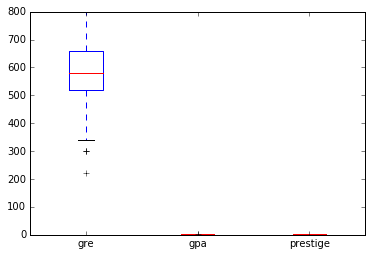

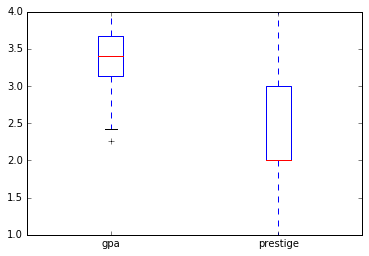

In [74]:
data.loc[:,"gre":"prestige"].plot(kind='box')
data.loc[:,"gpa":"prestige"].plot(kind='box')
#data.loc[:,"prestige":"prestige"].plot(kind='box')

In [71]:
#data.loc["gre"].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The plot shows the median for each (red line). Everything inside the box is in the 25%-75% quartile. Everyting outside up to the lines are either in the 0%-25% or the 75%-100% quartiles. Everything between the lines and the plusses are outliers.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12340be90>]], dtype=object)

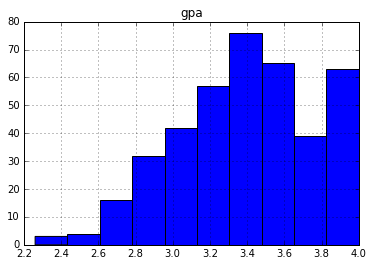

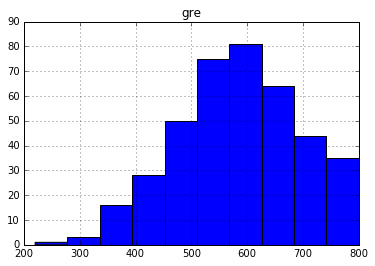

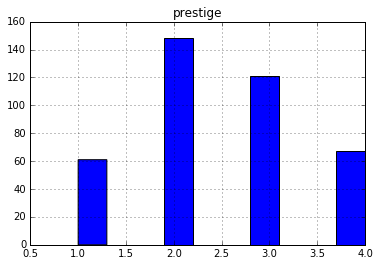

In [65]:
# plot the distribution of each variable 
data.hist('gpa')
data.hist('gre')
data.hist('prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It would not. GPA does follow the curve.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It does need correction because GPA does not follow a normal distribution. You could try removing outliers from both sides.

#### Question 11. Which of our variables are potentially colinear? 

In [79]:
# create a correlation matrix for the data
data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: I found that while gre and gpa had had an affect on admission, prestige had a larger affect. None of the independent variables were colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would look at the colinearity matrix.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that the higher gpa, gre, and school prestige, the more likely a student would be to be admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data